In [15]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.9 MB/s eta 0:00:00


# Using Libraries

In [ ]:
import numpy as np
from hmmlearn import hmm

# Generate synthetic data
np.random.seed(42)
n_samples = 100
transition_matrix = np.array([[0.7, 0.3], [0.4, 0.6]])  # Transition matrix
emission_matrix = np.array([[0.9, 0.1], [0.2, 0.8]])  # Emission matrix
start_probabilities = np.array([0.5, 0.5])  # Initial state probabilities

model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = start_probabilities
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

# Generate observations and hidden states
hidden_states, observations = model.sample(n_samples, n_trials=1)

# Fit HMM to the data
model.fit(observations)

# Predict hidden states
predicted_states = model.predict(observations)

print("True hidden states:", hidden_states)
print("Predicted hidden states:", predicted_states)


In [ ]:
import numpy as np
from hmmlearn import hmm

# For this example, we will model the stages of a conversation,
# where each sentence is "generated" with an underlying topic, "cat" or "dog"
states = ["cat", "dog"]
id2topic = dict(zip(range(len(states)), states))
# we are more likely to talk about cats first
start_probs = np.array([0.6, 0.4])

# For each topic, the probability of saying certain words can be modeled by
# a distribution over vocabulary associated with the categories

vocabulary = ["tail", "fetch", "mouse", "food"]
# if the topic is "cat", we are more likely to talk about "mouse"
# if the topic is "dog", we are more likely to talk about "fetch"
emission_probs = np.array([[0.25, 0.1, 0.4, 0.25],
                           [0.2, 0.5, 0.1, 0.2]])

# Also assume it's more likely to stay in a state than transition to the other
trans_mat = np.array([[0.8, 0.2], [0.2, 0.8]])


# Pretend that every sentence we speak only has a total of 5 words,
# i.e. we independently utter a word from the vocabulary 5 times per sentence
# we observe the following bag of words (BoW) for 8 sentences:
observations = [["tail", "mouse", "mouse", "food", "mouse"],
        ["food", "mouse", "mouse", "food", "mouse"],
        ["tail", "mouse", "mouse", "tail", "mouse"],
        ["food", "mouse", "food", "food", "tail"],
        ["tail", "fetch", "mouse", "food", "tail"],
        ["tail", "fetch", "fetch", "food", "fetch"],
        ["fetch", "fetch", "fetch", "food", "tail"],
        ["food", "mouse", "food", "food", "tail"],
        ["tail", "mouse", "mouse", "tail", "mouse"],
        ["fetch", "fetch", "fetch", "fetch", "fetch"]]

# Convert "sentences" to numbers:
vocab2id = dict(zip(vocabulary, range(len(vocabulary))))
def sentence2counts(sentence):
    ans = []
    for word, idx in vocab2id.items():
        count = sentence.count(word)
        ans.append(count)
    return ans

X = []
for sentence in observations:
    row = sentence2counts(sentence)
    X.append(row)

data = np.array(X, dtype=int)

# pretend this is repeated, so we have more data to learn from:
lengths = [len(X)]*5
sequences = np.tile(data, (5,1))


# Set up model:
model = hmm.MultinomialHMM(n_components=len(states),
        n_trials=len(observations[0]),
        n_iter=50,
        init_params='')

model.n_features = len(vocabulary)
model.startprob_ = start_probs
model.transmat_ = trans_mat
model.emissionprob_ = emission_probs
model.fit(sequences, lengths)
logprob, received = model.decode(sequences)

print("Topics discussed:")
print([id2topic[x] for x in received])

print("Learned emission probs:")
print(model.emissionprob_)

print("Learned transition matrix:")
print(model.transmat_)

# Try to reset and refit:
new_model = hmm.MultinomialHMM(n_components=len(states),
        n_trials=len(observations[0]),
        n_iter=50, init_params='ste')

new_model.fit(sequences, lengths)
logprob, received = new_model.decode(sequences)

print("\nNew Model")
print("Topics discussed:")
print([id2topic[x] for x in received])

print("Learned emission probs:")
print(new_model.emissionprob_)

print("Learned transition matrix:")
print(new_model.transmat_)

In [ ]:
import numpy as np
from hmmlearn import hmm


states = ["Sunny", "Rainy"]
id2topic = dict(zip(range(len(states)), states))

start_probs = np.array([0.7, 0.3])
vocabulary = ["School", "Party", "Rest"]
emission_probs = np.array([[0.6, 0.1, 0.3],
                           [0.3,0.2, 0.5]])
trans_mat = np.array([[0.7, 0.3], [0.6, 0.4]])

observations = [["Rest", "School", "Rest"]]

# Convert "sentences" to numbers:
vocab2id = dict(zip(vocabulary, range(len(vocabulary))))
def sentence2counts(sentence):
    ans = []
    for word, idx in vocab2id.items():
        count = sentence.count(word)
        ans.append(count)
    return ans

X = []
for sentence in observations:
    row = sentence2counts(sentence)
    X.append(row)

data = np.array(X, dtype=int)

# pretend this is repeated, so we have more data to learn from:
lengths = [len(X)]*3
sequences = np.tile(data, (3,1))


# Set up model:
model = hmm.MultinomialHMM(n_components=len(states),
        n_trials=len(observations[0]),
        n_iter=50,
        init_params='')

model.n_features = len(vocabulary)
model.startprob_ = start_probs
model.transmat_ = trans_mat
model.emissionprob_ = emission_probs
model.fit(sequences, lengths)
logprob, received = model.decode(sequences)

print("Topics discussed:")
print([id2topic[x] for x in received])

print("Learned emission probs:")
print(model.emissionprob_)

print("Learned transition matrix:")
print(model.transmat_)

# Try to reset and refit:
new_model = hmm.MultinomialHMM(n_components=len(states),
        n_trials=len(observations[0]),
        n_iter=50, init_params='ste')

new_model.fit(sequences, lengths)
logprob, received = new_model.decode(sequences)

print("\nNew Model")
print("Topics discussed:")
print([id2topic[x] for x in received])

print("Learned emission probs:")
print(new_model.emissionprob_)

print("Learned transition matrix:")
print(new_model.transmat_)

# From Scratch

In [1]:
import numpy as np

class HiddenMarkovModel:

    def __init__(self, states, observations, tp, ep, pi):

        self.states = np.array(states)
        self.observations = np.array(observations)
        self.num_states = self.states.shape[0]
        self.num_observations = self.observations.shape[0]
        self.tp = np.array(tp)
        self.ep = np.array(ep)
        self.pi = np.array(pi)

    def likelihood(self, obs):

        prob, _ = self.likelihood_forward(obs)
        return prob

    def likelihood_forward(self, obs):

        T = len(obs)
        alpha = np.zeros((self.num_states, T))

        # initialization
        o_0 = self._get_observation_idx(obs[0])
        alpha[:, 0] = self.pi * self.ep[:, o_0]

        # recursion
        for t in range(1, T):
            o_t = self._get_observation_idx(obs[t])
            alpha[:, t] = alpha[:, t-1].dot(self.tp) * self.ep[:, o_t]

        # termination
        prob = alpha[:, T-1].sum()

        return prob, alpha

    def likelihood_backward(self, obs):

        T = len(obs)
        beta = np.zeros((self.num_states, T))

        # initialization
        beta[:, T-1] = 1

        # recursion
        for t in range(T-2, -1, -1):
            o_t1 = self._get_observation_idx(obs[t+1])
            beta[:, t] = self.tp.dot(self.ep[:, o_t1] * beta[:, t+1])

        # termination
        o_0 = self._get_observation_idx(obs[0])
        prob = self.pi.dot(self.ep[:, o_0] * beta[:, 0])

        return prob, beta

    def decode(self, obs):

        T = len(obs)
        delta = np.zeros((self.num_states, T))

        # initialization
        o_0 = self._get_observation_idx(obs[0])
        delta[:, 0] = self.pi * self.ep[:, o_0]

        # recursion
        for t in range(1, T):
            o_t = self._get_observation_idx(obs[t])
            delta_prev = delta[:, t-1].reshape(-1, 1)
            delta[:, t] = (delta_prev * self.tp).max(axis=0) * self.ep[:, o_t]

        # termination
        path = self.states[delta.argmax(axis=0)]
        prob = delta[:, T-1].max()

        return path, prob

    def learn(self, obs, iterations=1):

        for _ in range(iterations):
            T = len(obs)

            # expectation step
            likelihood, alpha = self.likelihood_forward(obs)
            _, beta = self.likelihood_backward(obs)
            gamma = alpha * beta / (alpha * beta).sum(axis=0)
            xi = np.zeros((self.num_states, self.num_states, T-1))
            for t in range(T-1):
                o_t1 = self._get_observation_idx(obs[t+1])
                for i in range(self.num_states):
                    xi[i, :, t] = alpha[i, t] * self.tp[i, :] \
                                    * self.ep[:, o_t1] * beta[:, t+1]
            xi /= xi.sum(axis=(0, 1))

            # maximization step
            self.pi = gamma[:, 0]
            self.tp = xi.sum(axis=2) / gamma[:, :-1].sum(axis=1).reshape(-1, 1)
            for idx, o in enumerate(self.observations):
                indices = np.argwhere(obs == o).flatten()
                self.ep[:, idx] = gamma[:, indices].sum(axis=1) \
                    / gamma.sum(axis=1)

    def _get_observation_idx(self, o):
        """Get the vocabulary index value of an observation."""
        return np.argwhere(self.observations == o).flatten().item()

In [2]:
state_space =  ["Sunny", "Rainy"]
observation_space = ["School", "Party", "Rest"]

initial_probabilities = [0.7, 0.3]
transition_probabilities = [[0.7, 0.3], [0.6, 0.4]]
emission_probabilities = [[0.6, 0.1, 0.3],
                           [0.3,0.2, 0.5]]

In [3]:
hmm = HiddenMarkovModel(state_space, observation_space, transition_probabilities,
                        emission_probabilities, initial_probabilities)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


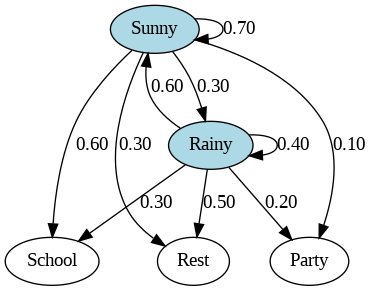

In [4]:
# visualize

!pip install pydotplus
!apt-get install graphviz -y
import pydotplus
from IPython.display import Image

def draw_graph(model, filename="hmm.png"):
    graph = pydotplus.Dot()
    states = model.states
    for i in range(model.num_states):
        state = states[i]
        node = pydotplus.Node(str(i), label=state, style="filled", fillcolor="lightblue")
        graph.add_node(node)

    for i in range(model.num_states):
        for j in range(model.num_states):
            edge = pydotplus.Edge(str(i), str(j), label="{:.2f}".format(model.tp[i, j]))
            graph.add_edge(edge)

    for i in range(model.num_states):
        for j in range(model.num_observations):
            observation = model.observations[j]
            edge = pydotplus.Edge(str(i), observation, label="{:.2f}".format(model.ep[i, j]))
            graph.add_edge(edge)

    graph.write_png(filename)

    return graph

draw_graph(hmm)
Image(filename="hmm.png")


In [5]:
observation_sequence = ["Rest", "School", "Rest"]
likelihood = hmm.likelihood(observation_sequence)
print("* Observation sequence: {}".format(observation_sequence))
print("* Likelihood: {:.2e}".format(likelihood))

* Observation sequence: ['Rest', 'School', 'Rest']
* Likelihood: 6.52e-02


In [6]:
# determine most likely state sequence
path, prob = hmm.decode(observation_sequence)
print("* Observation sequence: {}".format(observation_sequence))
print("* Most likely hidden state path: {}".format(path))
print("* Likelihood for observation sequence along path: {:.2e}".format(prob))

* Observation sequence: ['Rest', 'School', 'Rest']
* Most likely hidden state path: ['Sunny' 'Sunny' 'Sunny']
* Likelihood for observation sequence along path: 1.85e-02


# Develop a system that can extract the word from the given sentences using the Hidden

In [27]:
!wget https://raw.githubusercontent.com/mohammed1916/HMM-text-correction/master/data/bigram_counts.txt
!wget https://raw.githubusercontent.com/mohammed1916/HMM-text-correction/master/data/trigram_counts.txt
!wget https://raw.githubusercontent.com/mohammed1916/HMM-text-correction/master/data/unigram_counts.txt
!wget https://raw.githubusercontent.com/mohammed1916/HMM-text-correction/master/data/vocab.txt


--2024-05-02 09:12:36--  https://raw.githubusercontent.com/mohammed1916/HMM-text-correction/master/data/bigram_counts.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406784 (2.3M) [text/plain]
Saving to: ‘bigram_counts.txt.1’

bigram_counts.txt.1 100%[===================>]   2.29M  --.-KB/s    in 0.06s   

2024-05-02 09:12:36 (35.8 MB/s) - ‘bigram_counts.txt.1’ saved [2406784/2406784]

--2024-05-02 09:12:36--  https://raw.githubusercontent.com/mohammed1916/HMM-text-correction/master/data/trigram_counts.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaitin

In [30]:
from random import random
from bisect import bisect, bisect_left


class ProbWords(object):
    def __init__(self):
        self.items = [0]
        self.prob = [0]
        self.cummulative_prob = [0]

    def push(self, item, prob):
        self.items.append(item)
        self.prob.append(prob)
        self.cummulative_prob.append(self.cummulative_prob[-1] + prob)

    def guess(self):
        if len(self.items) == 1:
            return 0
        guess = random() * self.cummulative_prob[-1]
        index = bisect(self.cummulative_prob, guess)
        return self.items[index]

    def options(self):
        for i in range(1, len(self.items)):
            yield self.items[i], self.prob[i]

    def word_prob(self, item):
        index = bisect_left(self.items, item)
        if index == len(self.items) or self.items[index] != item:
            return 0
        return self.prob[index]

In [32]:
def levenshtein(s1, s2):
    """Calculates the edit distance between two words.

    This method is copied from:
    https://en.wikibooks.org/wiki/Algorithm_Implementation/Strings/Levenshtein_distance#Python

    Args:
        s1 (str): first word
        s2 (str): second word

    Returns:
        int: edit distance
    """
    if len(s1) < len(s2):
        return levenshtein(s2, s1)

    # len(s1) >= len(s2)
    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]

In [37]:
"""Methods for loading word probabilities from files
"""
from collections import defaultdict


def load_data():
    vocab = load_vocab()
    unigrams = load_unigrams()
    bigrams = load_bigrams()
    trigrams = load_trigrams()

    return vocab, unigrams, bigrams, trigrams


def load_vocab(src="/content/vocab.txt"):
    vocab = [None]

    with open(src) as f:
        for line in f:
            words = line.split()
            vocab.append(words[1])
    return vocab


def load_unigrams(src="/content/unigram_counts.txt"):
    unigrams = ProbWords()

    with open(src) as f:
        for line in f:
            words = line.split()
            item = int(words[0])
            log_prob = float(words[1])
            prob = 10 ** log_prob
            unigrams.push(item, prob)
    return unigrams


def load_bigrams(src="/content/bigram_counts.txt"):
    bigrams = defaultdict(ProbWords)

    with open(src) as f:
        for line in f:
            words = line.split()
            key = int(words[0])
            item = int(words[1])
            log_prob = float(words[2])
            prob = 10 ** log_prob
            bigrams[key].push(item, prob)
    return bigrams


def load_trigrams(src="/content/trigram_counts.txt"):
    trigrams = defaultdict(ProbWords)

    with open(src) as f:
        for line in f:
            words = line.split()
            key = (int(words[0]), int(words[1]))
            item = int(words[2])
            log_prob = float(words[3])
            prob = 10 ** log_prob
            trigrams[key].push(item, prob)
    return trigrams

In [33]:
"""Tree structure for searching the states of a sentence
"""
from collections import defaultdict


class Node:

    def __init__(self, word, prob, parent, level):
        self.word = word
        self.prob = prob
        self.parent = parent
        self.level = level


class SearchTree(object):
    def __init__(self):
        self.root = Node(153, 1, None, 0)
        self.levels = defaultdict(dict)
        self.levels[0][153] = self.root

    def push(self, parent, word, prob):
        level = parent.level + 1
        node = Node(word, prob, parent, level)
        if word in self.levels[level].keys():
            if prob > self.levels[level][word].prob:
                self.levels[level][word] = node
        else:
            self.levels[level][word] = node

    def level(self, level):
        for word in self.levels[level].keys():
            yield self.levels[level][word]

    def path(self, node):
        path = []
        while node != self.root:
            path.append(node.word)
            node = node.parent
        return reversed(path)

In [48]:
from math import factorial, exp

vocab = load_vocab()
bigrams = load_bigrams()


def correct_sentence(observations, n=3):
    observations = observations.split()
    tree = SearchTree()

    for level, o in enumerate(observations):
        for node in tree.level(level):
            # keep track of the best n words to expand the tree
            best_probs = [0 for _ in range(n)]
            best_words = [0 for _ in range(n)]

            for word, state_prob in bigrams[node.word].options():
                obsv_prob = observation_prob(o, vocab[word])
                prob = obsv_prob * state_prob * node.prob
                if prob > min(best_probs):
                    index = best_probs.index(min(best_probs))
                    best_probs[index] = prob
                    best_words[index] = word

            for w, p in zip(best_words, best_probs):
                if w == 0:
                    continue
                tree.push(node, w, p)

    leaf_level = len(observations)
    best_leaf = Node(0, 0, None, 0)

    for node in tree.level(leaf_level):
        if node.prob > best_leaf.prob:
            best_leaf = node

    sentence = [vocab[w] for w in tree.path(best_leaf)]
    return sentence


def print_tree(tree, observations, max_depth=4):
    for i in range(1, max_depth):
        for node in tree.level(i):
            print("level:", i)
            print("parent:", vocab[node.parent.word])
            print("word:", vocab[node.word])
            ldist = levenshtein(observations[i - 1], vocab[node.word])
            print("Levenshtein Distance:", ldist)
            bi_prob = bigrams[node.parent.word].word_prob(node.word)
            obsv_prob = observation_prob(observations[i - 1], vocab[node.word])
            interp_prob = bi_prob * obsv_prob
            print("Interpretation Prob:", "{:.3}".format(interp_prob))
            print("Cumulative Prob:", "{:.3}".format(node.prob))
            print()


def observation_prob(obsv, hidden, lam=0.01):
    k = levenshtein(obsv, hidden)
    return lam ** k * exp(-lam) / factorial(k)


def print_sentence(sentence):
    text = ""

    for word in sentence:
        text += " "
        text += word
    print(text)


In [47]:
test_sentences = ["I think hat twelve thousand rupees",
                  "she haf heard them",
                  "She was ulreedy quit live",
                  "John Knightly wasn't hard at work",
                  "he said nit word by"]

for test_sentence in test_sentences:
    print(test_sentence + " -->")
    corrected_sentence = " ".join(correct_sentence(test_sentence))
    print(corrected_sentence)
    ldist = levenshtein(test_sentence, corrected_sentence)
    # print("Levenshtein Distance:", ldist)
    print()

I think hat twelve thousand rupees -->
I think at twelve thousand times

she haf heard them -->
she had heard them

She was ulreedy quit live -->
She was already quite like

John Knightly wasn't hard at work -->
John Knightley was hard at work

he said nit word by -->
he said it would be



# Ref

In [40]:
vocab, unigrams, bigrams, trigrams = load_data()


def gen_sentence():
    start = 153
    end = 152

    # initialize the sentence with the start word
    sentence = [start]
    # append a word using the bigram of the start character
    sentence.append(bigrams[start].guess())

    while sentence[-1] != end:
        # try to guess a word using the trigram of the previous two characters
        guess = trigrams[tuple(sentence[-2:])].guess()

        if guess == 0:
            # if no word was found try using the bigram
            guess = bigrams[sentence[-1]].guess()

        if guess == 0:
            # if still no word was found use the unigram
            guess = unigrams.guess()

        sentence.append(guess)

    # substitute the word indices with the real words
    word_sentence = [vocab[i] for i in sentence]
    return word_sentence


def print_sentence(sentence):
    text = sentence[1]
    punctuation = ['.', ',', ';', ':', '!', '?']

    for word in sentence[2:-1]:
        if word not in punctuation:
            text += " "
        text += word
    print(text)

if __name__ == "__main__":
    sentence = gen_sentence()
    print_sentence(sentence)

" And then there was no longer.


# Reference

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
from hmmlearn import hmm
import numpy as np
import nltk

# Sample sentences
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "I saw a man with a telescope.",
    "She sells sea shells by the sea shore."
]

# Tokenize sentences into words
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

# Create a dictionary to map words to integers
word_to_int = {}
for sentence in tokenized_sentences:
    for word in sentence:
        if word not in word_to_int:
            word_to_int[word] = len(word_to_int)

# Convert tokenized sentences to integer sequences
integer_sequences = [[word_to_int[word] for word in sentence] for sentence in tokenized_sentences]


In [23]:
# Define and train the HMM
model = hmm.MultinomialHMM(n_components=3, n_iter=100)
flattened_sequences = np.array(integer_sequences, dtype=object)
model.fit(flattened_sequences)

# Generate samples from the trained HMM
generated_samples, _ = model.sample(n_samples=5)

# Convert integer samples back to words
int_to_word = {v: k for k, v in word_to_int.items()}
generated_sentences = [[int_to_word[idx] for idx in sample] for sample in generated_samples]

print("Generated sentences:")
for sentence in generated_sentences:
    print(" ".join(sentence))

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


ValueError: setting an array element with a sequence.

In [24]:
from collections import defaultdict
from random import random
import time
import sys
import numpy as np

class HmmNERTAG():
    def __init__(self,trainfolderpath):
        self.sentenceandtags = self.dataset(trainfolderpath)
        self.tags = list(self.sentenceandtags.values())
        self.sentences = list(self.sentenceandtags.keys())
        self.tag_uniques,self.tag_bigramcounts,self.tag_unigramcounts = self.Ngram(self.tags)
        self.states = self.tag_uniques
        self.initial_probs,self.emission_counts,self.transition_counts = self.HMM(self.sentenceandtags)
        self.observations, sentence_bigram_counts, sentence_unigrams = self.Ngram(self.sentences)
        self.tag_uniques.remove("start")
        self.tag_uniques.remove("end")
    def dataset(self,folderpath):
        datafile = open(folderpath, "r")
        datafile.readline()
        datafile.readline()
        sentence_tagsdict = defaultdict(lambda: [])
        sentence = ""
        tags = []
        for line in datafile.readlines():
            line = line[:-1].lower() + "\n"

            if line == "\n":
                sentence = sentence.rstrip(" ")
                sentence_tagsdict[sentence] = tags
                sentence = ""
                tags = []
                continue
            line = line.lower()
            line = line.rstrip("\n")
            line = line.split(" ")
            sentence += line[0] + " "
            tags.append(line[-1])

            datafile.close()
        return sentence_tagsdict

    def HMM(self,listofsentences):
        initial_probs = {}
        emissions = defaultdict(lambda: defaultdict(lambda: 0))
        transition_counts = defaultdict(lambda: defaultdict(lambda: 1))

        # print(emissions['ORG']["EU"])
        for k, v in self.sentenceandtags.items():
            k = k.split()
            if "start" in v:
                v.remove("start")
                v.remove("end")
            for sent_element, tag in zip(k, v):
                emissions[tag][sent_element] += 1
        # initial probs
        for tagkey in ['i-misc', 'b-misc', 'i-org', 'i-per', 'b-org', 'b-per', 'o', 'b-loc', 'i-loc']:
            if self.tag_bigramcounts[('start', tagkey)]==0:
                initial_probs[tagkey] = np.log((self.tag_bigramcounts[('start', tagkey)]+1)/(len(self.sentences)+9))
            else:
                initial_probs[tagkey] = np.log(self.tag_bigramcounts[('start', tagkey)] / len(self.sentences))
        for tag1 in ['i-misc', 'start', 'end', 'b-misc', 'i-org', 'i-per', 'b-org', 'b-per', 'o', 'b-loc', 'i-loc']:
            if tag1 == 'start':
                continue
            for tag2 in ['i-misc', 'end', 'b-misc', 'i-org', 'i-per', 'b-org', 'b-per', 'o', 'b-loc', 'i-loc']:
                transition_counts[tag1][tag2] = self.tag_bigramcounts[(tag1, tag2)]


        return (initial_probs, emissions, transition_counts)
    def Ngram(self,sentences):
        unique_words = set()
        bigramcounts = defaultdict(lambda: 0)
        unigramcounts = defaultdict(lambda: 0)
        for temp in sentences:
            sentence = temp
            if not isinstance(sentence, list):
                sentence = sentence.split(" ")
            for i in range(len(sentence)):
                unigramcounts[sentence[i]] += 1
            sentence.insert(0, "start")
            sentence.append("end")
            for i in range(len(sentence) - 1):
                bigramcounts[(sentence[i], sentence[i + 1])] += 1
                unique_words.add(sentence[i])
                unique_words.add(sentence[i + 1])
        return list(unique_words), bigramcounts, unigramcounts

    def get_emission_prob(self,test_tag, test_emission):
        ret = 0.0
        if self.emission_counts[test_tag][test_emission] == 0:
            ret = np.log(1 / (sum(list(self.emission_counts[test_tag].values())) + len(self.observations)))
        else:
            ret = np.log(self.emission_counts[test_tag][test_emission] / sum(list(self.emission_counts[test_tag].values())))
        return ret

    def get_transition_probs(self, testtag1, testtag2):
        if self.transition_counts[testtag1][testtag2] == 0:
            return np.log(1 / (self.tag_unigramcounts[testtag1] + 9))
        else:
            return np.log(self.transition_counts[testtag1][testtag2] / self.tag_unigramcounts[testtag1])
    def viterbi(self,hmm_out, testsentences):
        init_probs, emit_counts, transitions_counts = hmm_out
        test_tags=[]
        for test in testsentences:
            test_sentence = test.split(" ")
            table = np.zeros((len(self.states), len(test_sentence)))
            trace = np.full(len(test_sentence), -1)
            for state in range(len(self.states)):
                table[state][0] = init_probs[self.states[state]] + self.get_emission_prob(self.states[state],test_sentence[0])
            current_state = np.argmax(table[:, 0])
            trace[0] = current_state

            num_repeats = 0

            for sentence_part in range(1, len(test_sentence)):
                maxarg = np.argmax(table[:, sentence_part - 1])
                maxval = max(table[:, sentence_part - 1])

                for state in range(len(self.states)):
                    table[state][sentence_part] = maxval +self. get_transition_probs(self.states[maxarg],
                                                                                self.states[state]) +self.get_emission_prob(
                        self.states[state], test_sentence[sentence_part])

                next_state = np.argmax(table[:, sentence_part])
                if next_state == maxarg:
                    num_repeats += 1
                else:
                    num_repeats = 0
                trace[sentence_part] = next_state
                current_state = next_state

            traces = []
            for t in trace:
                traces.append(self.states[t])
            test_tags.append(traces)

        return test_tags
    def accuracy(self,test_tags,gold_sequences):
        trues = 0
        total = 0
        for ypred, gold_sequence in zip(test_tags, gold_sequences):
            for y, goldy in zip(ypred, gold_sequence):
                if y == goldy:
                    trues += 1
        for sent in gold_sequences:
            total += len(sent)
        return trues / total

def main() :
    trainfiledir = "train.txt"
    testfiledir = "test.txt"

    model = HmmNERTAG(trainfiledir )

    testsentence_tags = model.dataset(testfiledir)
    testsentences = list(testsentence_tags.keys())
    gold_sequences = list(testsentence_tags.values())
    hmmmodel = model.HMM(model.sentenceandtags)
    ypreds = model.viterbi(hmmmodel,testsentences)
    print(model.accuracy(ypreds,gold_sequences))
main()

FileNotFoundError: [Errno 2] No such file or directory: 'train.txt'

In [16]:
# prompt: Develop a system that can extract the word from the given sentences using the Hidden
# Markov model.'

# Import the necessary libraries
import numpy as np
from hmmlearn import hmm
import pydotplus
from IPython.display import Image

# Define the states and observations
states = ["Noun", "Verb", "Adjective", "Adverb"]
observations = ["the", "cat", "sat", "on", "the", "mat"]

# Define the transition probabilities
transition_probabilities = np.array([[0.5, 0.2, 0.3, 0.0],
                                   [0.1, 0.6, 0.2, 0.1],
                                   [0.2, 0.3, 0.4, 0.1],
                                   [0.1, 0.2, 0.3, 0.4]])

# Define the emission probabilities
emission_probabilities = np.array([[0.1, 0.2, 0.3, 0.4],
                                  [0.5, 0.2, 0.1, 0.2],
                                  [0.3, 0.4, 0.2, 0.1],
                                  [0.2, 0.1, 0.4, 0.3]])

# Define the initial state probabilities
initial_probabilities = np.array([0.2, 0.3, 0.4, 0.1])

# Create the HMM model
model = hmm.MultinomialHMM(n_components=len(states))
model.startprob_ = initial_probabilities
model.transmat_ = transition_probabilities
model.emissionprob_ = emission_probabilities

# Fit the model to the data
model.fit(observations)

# Predict the hidden states
hidden_states = model.predict(observations)

# Print the results
print("Hidden states:", hidden_states)
print("Most likely word:", states[hidden_states[-1]])


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


ValueError: Expected 2D array, got 1D array instead:
array=['the' 'cat' 'sat' 'on' 'the' 'mat'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.